## Charlie Korsak Section A

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 4
Due 11/4/2024 by 5p

### Problem 1
Write a function ```greaterThan(A, lower_lim)``` that takes as an argument a numpy array A and a number lower_lim and returns an array with every entry less than or equal to lower_lim replaced by zero. That is to say, only the numbers strictly greater than lower_lim remain, the rest are 0.

In [2]:
import numpy as np
def greaterThan(A, lower_lim):
    #create a new array where entries less than or equal to lower_lim are replaced with 0
    result = np.where(A > lower_lim, A, 0)
    return result



In [4]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

You passed all the tests!


### Problem 2
Write a function ```subtractMean(A)``` that takes as an input the numpy array and returns the array with the mean of all the values subtracted from every element.

In [6]:
import numpy as np
def subtractMean (A) :
    #calculate the mean of the array
    mean_value = np.mean(A)
    #subtract mean from each element
    result = A - mean_value
    return result

If the tests below aren't passing, check the values of A, B, and C. These should be the same as in the test for Problem 1. If the values in these arrays have changed, why might that be?

In [8]:
assert np.isclose(subtractMean(A), np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])).all()
assert np.isclose(subtractMean(B), np.array([[-1.5,  0.5],[ 1.5, -2.5],[-0.5,  2.5]])).all()
assert np.isclose(subtractMean(C), np.array([[ 1.1,  0. , -0.1],[-0.2,  0.1, -1.1],[ 3.2, -1. , -2. ]])).all()

print("You passed all the tests!")


You passed all the tests!


### Problem 3

Write a function ```arrayEdges``` that takes as an input an array and returns a 1-D array of all the elements on the edges of the array starting at the upper left corner and working around clockwise. Do not repeat that first element. If the original array is not 2-D, print('Error') and return -1.

*Hint*: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners), and make an array of zeros the size of the perimeter. Then fill that array.

*Hint 2*: The length of the shape of a 2-D array is 2.

*Hint 3*: ```dA = A.dtype``` is the data type of A. ```np.zeros().astype(dA)``` creates an array of that type (if A has strings, this will make an array of '0').

In [10]:
import numpy as np

def arrayEdges(A):
    # Check if A is a 2-D array
    if A.ndim != 2:
        print('Error')
        return -1
    
    # Get shape of the array
    height, width = A.shape
    # Calculate perimeter length
    perimeter_length = 2 * (height + width) - 4
    
    # Create an array of zeros with the same data type as A
    edges = np.zeros(perimeter_length, dtype=A.dtype)
    
    index = 0
    
    # Top row (left to right)
    for col in range(width):
        edges[index] = A[0, col]
        index += 1
    
    # Right column (top to bottom)
    for row in range(1, height - 1):
        edges[index] = A[row, width - 1]
        index += 1
    
    # Bottom row (right to left)
    if height > 1:  # Ensure there is a bottom row
        for col in range(width - 1, -1, -1):
            edges[index] = A[height - 1, col]
            index += 1
    
    # Left column (bottom to top)
    if width > 1:  # Ensure there is a left column
        for row in range(height - 2, 0, -1):
            edges[index] = A[row, 0]
            index += 1
    
    return edges

In [12]:
'''Test your code'''

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])

assert np.array(arrayEdges(X) == np.array([1, 2, 3, 6, 9, 8, 7, 4])).all()
assert np.array(arrayEdges(Y) == np.array(['you', 'got', 'this', 'problem', 'correct', '!'])).all()
assert arrayEdges(Z) == -1

print("You passed all the tests! (disregard that it says Error above...it's supposed to do that)")


Error
You passed all the tests! (disregard that it says Error above...it's supposed to do that)


## Palmer's Penguins

Below I've imported the Palmer's Penguins dataset, courtesy of Alison Horst's github. Fill in the blanks in Problem 4. You should add code cells below to write code to find the answers.

In [14]:
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
pp_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Problem 4

 1. How many penguins were recorded? 

  - 344

 2. In terms of body mass, how big were the smallest and biggest penguins measured?

  - Smallest= Penguin 314 (2700 g)
  - Biggest = Penguin 169 (6300 g)

 3. What species of penguins were recorded and how many of each?

 - Adelie (152)
 - Gentoo       124
 - Chinstrap     68

In [16]:
import pandas as pd

# Load the dataset
pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')

# Number of penguins recorded
num_penguins = len(pp_df)  # or you can use pp_df.shape[0]
print("Number of penguins recorded:", num_penguins)

Number of penguins recorded: 344


In [18]:
import pandas as pd

# Load the dataset
pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')

# find the smallest and biggest penguins in body mass
largest_penguin = pp_df.loc[pp_df['body_mass_g'].idxmax()]
smallest_penguin = pp_df.loc[pp_df['body_mass_g'].idxmin()]

print("Largest penguin:\n", largest_penguin)
print("\nSmallest penguin:\n", smallest_penguin)

Largest penguin:
 species              Gentoo
island               Biscoe
bill_length_mm         49.2
bill_depth_mm          15.2
flipper_length_mm     221.0
body_mass_g          6300.0
sex                    male
year                   2007
Name: 169, dtype: object

Smallest penguin:
 species              Chinstrap
island                   Dream
bill_length_mm            46.9
bill_depth_mm             16.6
flipper_length_mm        192.0
body_mass_g             2700.0
sex                     female
year                      2008
Name: 314, dtype: object


In [20]:
import pandas as pd

# Load the dataset
pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')

# Count the number of each species
species_counts = pp_df['species'].value_counts()

print("Number of penguins by species:\n", species_counts)

Number of penguins by species:
 species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


### Problem 5

Plot a histogram of the body masses of penguins grouped by species. Make sure to include a title, axis labels, and a legend.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


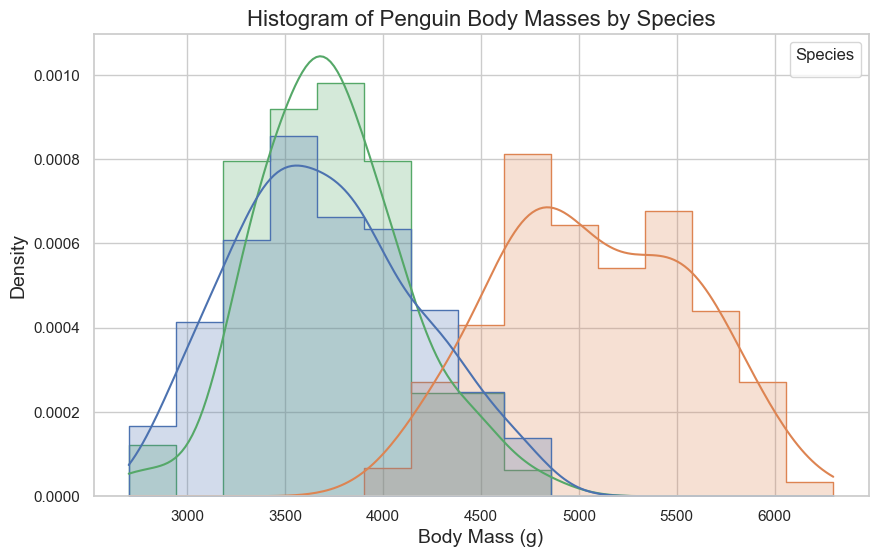

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')

# Set the style for seaborn
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=pp_df, x='body_mass_g', hue='species', bins=15, kde=True, element='step', stat='density', common_norm=False)

# Add titles and labels
plt.title('Histogram of Penguin Body Masses by Species', fontsize=16)
plt.xlabel('Body Mass (g)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Species')

# Show the plot
plt.show()

### Challenge Problem

Write a function ```interleaveArrays``` that takes as arguments two numpy arrays A and B and return a new numpy array with the rows of A and B interleaved, starting with A. If you run out of rows from one matrix or the other complete the array with the remaining rows of the longer array.

If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2

Example:

```
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)
```
returns
```
array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]])
```

In [32]:
import numpy as np

def interleaveArrays(A, B):
    # Check if the shapes of the arrays are compatible
    if A.shape[1] != B.shape[1]:
        print('Error: Shapes of arrays are not compatible.')
        return -1

    # Check if the types of the arrays are compatible
    if A.dtype != B.dtype:
        print('Error: Types of arrays are not compatible.')
        return -2
    
# Create a list to store interleaved rows
    interleaved = []

In [34]:
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)

NameError: name 'interleave' is not defined